In [2]:
import pandas as pd

df = pd.read_csv("../data/nfl_2024_passing_stats.csv")
df.head()

print(df.columns)

df["TD_INT_ratio"] = df["TD"] / df["Int"].replace(0, 1)

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Awards', 'Player-additional'],
      dtype='object')


In [3]:
df["Td_per_game"] = df["TD"] / df["G"]

In [4]:
df.dtypes

Rk                   float64
Player                object
Age                  float64
Team                  object
Pos                   object
G                    float64
GS                   float64
QBrec                 object
Cmp                  float64
Att                  float64
Cmp%                 float64
Yds                  float64
TD                   float64
TD%                  float64
Int                  float64
Int%                 float64
1D                   float64
Succ%                float64
Lng                  float64
Y/A                  float64
AY/A                 float64
Y/C                  float64
Y/G                  float64
Rate                 float64
QBR                  float64
Sk                   float64
Yds.1                float64
Sk%                  float64
NY/A                 float64
ANY/A                float64
4QC                  float64
GWD                  float64
Awards                object
Player-additional     object
TD_INT_ratio  

In [5]:
df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Awards', 'Player-additional', 'TD_INT_ratio',
       'Td_per_game'],
      dtype='object')

In [6]:
print(df.columns.tolist())

['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Awards', 'Player-additional', 'TD_INT_ratio', 'Td_per_game']


In [7]:
df = df.rename(columns = {"Yds.1": "Sack_Yds"})
df.columns
print(df[["Player", "Cmp%", "Att", "Int%", "G", "TD%"]].head(6))


           Player  Cmp%    Att  Int%     G  TD%
0      Joe Burrow  70.6  652.0   1.4  17.0  6.6
1      Jared Goff  72.4  539.0   2.2  17.0  6.9
2  Baker Mayfield  71.4  570.0   2.8  17.0  7.2
3      Geno Smith  70.4  578.0   2.6  17.0  3.6
4     Sam Darnold  66.2  545.0   2.2  17.0  6.4
5   Lamar Jackson  66.7  474.0   0.8  17.0  8.6


In [8]:
df.duplicated().sum()
df[df.duplicated()]

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,Sack_Yds,Sk%,NY/A,ANY/A,4QC,GWD,Awards,Player-additional,TD_INT_ratio,Td_per_game


In [9]:
df = df[df["Pos"] == "QB"]
df["Pos"].unique()
df["Player"].head(100)

0          Joe Burrow
1          Jared Goff
2      Baker Mayfield
3          Geno Smith
4         Sam Darnold
            ...      
82       Josh Johnson
84       Tyson Bagent
85       Clayton Tune
87         Kyle Trask
107    Chris Oladokun
Name: Player, Length: 78, dtype: object

In [10]:
# function to only keep the totals of players who played on multiple teams and not their stats on each team so they only have one row
def keep_totals_only(df):
    duplicate_players = df["Player"][df["Player"].duplicated(keep=False)].unique()

    traded = df[df["Player"].isin(duplicate_players)]  # rows for traded players
    not_traded = df[~df["Player"].isin(duplicate_players)]

    traded_totals = traded[traded["Team"] == "TOT"]

    clean_df = pd.concat([not_traded, traded_totals], ignore_index=True)
    
    return clean_df

df = keep_totals_only(df)

In [11]:
df.isna().sum()

Rk                    0
Player                0
Age                   0
Team                  0
Pos                   0
G                     0
GS                    0
QBrec                16
Cmp                   0
Att                   0
Cmp%                  1
Yds                   0
TD                    0
TD%                   1
Int                   0
Int%                  1
1D                    0
Succ%                 1
Lng                   1
Y/A                   1
AY/A                  1
Y/C                   1
Y/G                   0
Rate                  1
QBR                   0
Sk                    0
Sack_Yds              0
Sk%                   0
NY/A                  0
ANY/A                 0
4QC                   0
GWD                   0
Awards               58
Player-additional     0
TD_INT_ratio          0
Td_per_game           0
dtype: int64

In [12]:
"Lng" in df.columns 
df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Sack_Yds', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Awards', 'Player-additional', 'TD_INT_ratio',
       'Td_per_game'],
      dtype='object')

In [13]:
df["Awards"] = df["Awards"].fillna(0)
df.isna().sum()

Rk                    0
Player                0
Age                   0
Team                  0
Pos                   0
G                     0
GS                    0
QBrec                16
Cmp                   0
Att                   0
Cmp%                  1
Yds                   0
TD                    0
TD%                   1
Int                   0
Int%                  1
1D                    0
Succ%                 1
Lng                   1
Y/A                   1
AY/A                  1
Y/C                   1
Y/G                   0
Rate                  1
QBR                   0
Sk                    0
Sack_Yds              0
Sk%                   0
NY/A                  0
ANY/A                 0
4QC                   0
GWD                   0
Awards                0
Player-additional     0
TD_INT_ratio          0
Td_per_game           0
dtype: int64

In [14]:
import os
os.getcwd()

df.to_csv("../data/nfl_2024_clean.csv", index=False)

In [15]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [16]:
# start of exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

df.describe()

,Rk,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,...,QBR,Sk,Sack_Yds,Sk%,NY/A,ANY/A,4QC,GWD,TD_INT_ratio,Td_per_game
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000,75.000000,75.000000,74.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,39.440000,28.053333,8.986667,7.253333,154.466667,236.360000,66.002703,1686.560000,10.720000,3.591892,...,47.770667,17.413333,114.773333,8.573200,5.872400,5.740267,0.880000,1.173333,1.764691,0.916188
std,24.302842,4.248667,5.532443,6.625286,139.290318,206.567157,12.156322,1556.041358,11.627739,2.633231,...,22.847626,16.376560,109.564442,12.190742,2.933931,3.207008,1.251594,1.545467,1.771855,0.704282
min,1.000000,22.000000,1.000000,0.000000,0.000000,0.000000,27.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,25.000000,4.000000,1.000000,21.500000,37.500000,61.125000,233.500000,1.000000,2.300000,...,35.100000,3.000000,21.500000,4.225000,5.100000,4.535000,0.000000,0.000000,0.583333,0.236111
50%,38.000000,27.000000,8.000000,6.000000,130.000000,228.000000,65.550000,1317.000000,7.000000,3.850000,...,47.600000,14.000000,92.000000,6.410000,5.980000,5.500000,0.000000,1.000000,1.400000,1.000000
75%,57.500000,30.000000,14.500000,14.500000,279.500000,412.000000,68.550000,3146.000000,18.500000,4.800000,...,62.950000,29.000000,194.500000,8.990000,6.640000,6.960000,1.000000,2.000000,2.522727,1.363971
max,106.000000,41.000000,17.000000,17.000000,460.000000,652.000000,100.000000,4918.000000,43.000000,13.600000,...,99.300000,68.000000,466.000000,100.000000,19.000000,19.000000,5.000000,7.000000,10.250000,2.529412


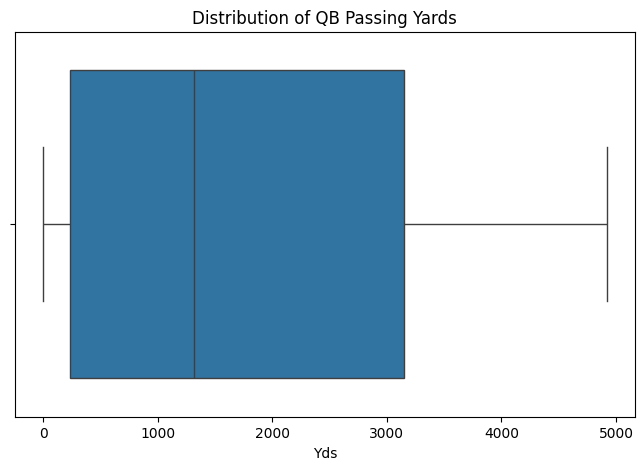

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Yds"])
plt.title("Distribution of QB Passing Yards")
plt.show()

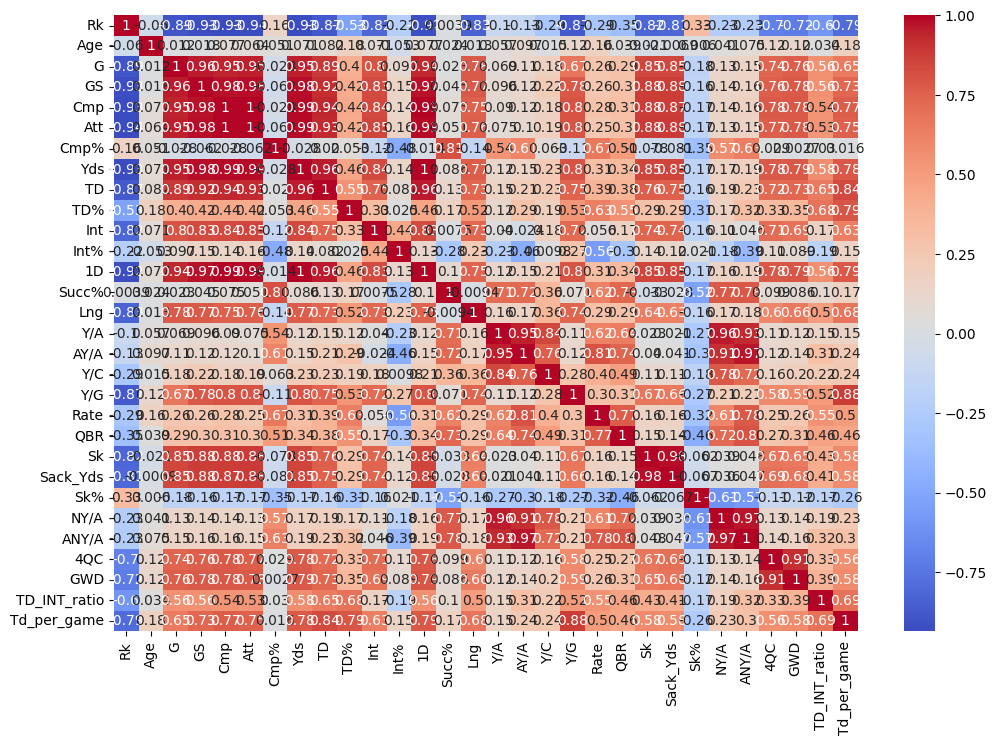

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [22]:
df["FantasyPoints"] = (
    df["Yds"] * 0.04 +
    df["TD"] * 4 +
    df["Int"] * -2
)

df[["Player", "FantasyPoints"]].head(5)

,Player,FantasyPoints
0,Joe Burrow,350.72
1,Jared Goff,309.16
2,Baker Mayfield,312.00
3,Geno Smith,226.80
4,Sam Darnold,288.76
